# Most Crowded Profession

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Imports


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [64]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Read the Experience data

In [65]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv', converters={'From': pd.to_datetime})
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,Teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,Fullstack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",Software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",Software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software


## Filter Internships , Student & Teaching

In [66]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship') & (df['title_tag'] != 'Student') & (df['title_tag'] != 'Teaching') ]

## Marking the Experience which started after 1 Jan. 2021

In [67]:
df['is_current'] = df['From'] >= datetime.datetime(2021, 1, 1)

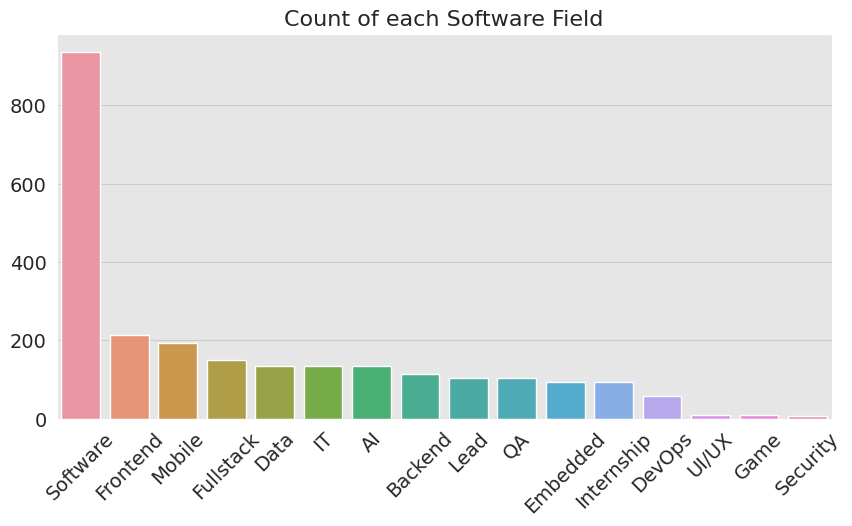

In [68]:
# showing the total count in each title_tag
df['title_tag'].value_counts()

# plot the count of each title_tag
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='title_tag', order=df['title_tag'].value_counts().index)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Count of each Software Field', fontsize=16)
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data in each title in the titles which we expect an increase in to be able to continue our analysis  | Matches |
>| The title related to AI/Data to be increased in the last years| - | - |
>| Trendy titles as Devops is to be increased also in the last years| - | - |
<br>

## Plotting the ratio between the title before & after 2021

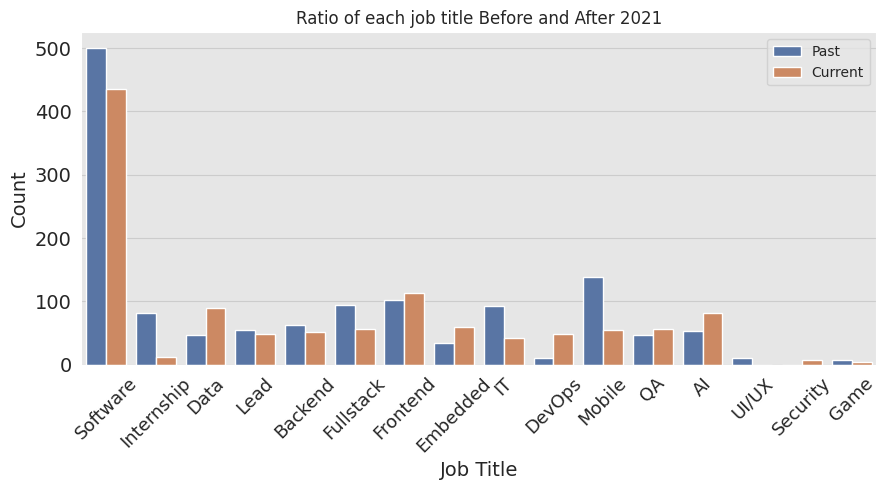

In [72]:
# vis the ratio of each job title in current jobs and past jobs in same graph
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(
    data=df,
    x='title_tag',
    hue='is_current',
    ax=ax
)
ax.set_title('Ratio of each job title Before and After 2021')
ax.set_xlabel('Job Title', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(['Past', 'Current'])
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


### Notes :
- Fields which is related to AI & Date are increasing
- Also Devops became more trendy in last years so it's field is increasing

## Plotting the Differences between titles before & after 2021

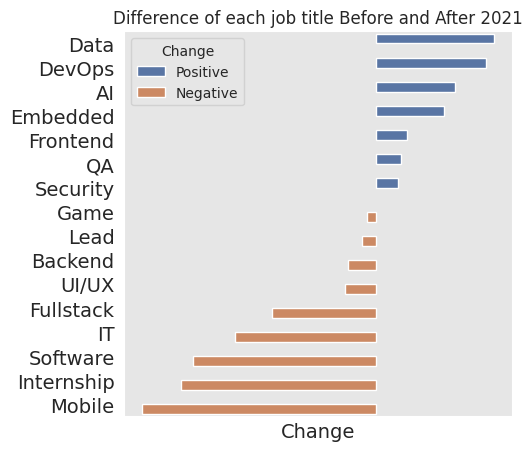

In [85]:
# get differnce of each job title in current jobs and past jobs and vis it
df_diff = df.groupby(['title_tag', 'is_current']).size().unstack().fillna(0)
df_diff['diff'] = df_diff[True] - df_diff[False]
df_diff['Change'] = np.where(df_diff['diff'] > 0, 'Positive', 'Negative')
df_diff = df_diff.sort_values(by='diff', ascending=False)

fig, ax = plt.subplots(figsize=(5, 5))
# make vertical bar plot
sns.barplot(
    data=df_diff,
    x='diff',
    y=df_diff.index,
    hue='Change',
    ax=ax
)
ax.set_title('Difference of each job title Before and After 2021')
ax.set_xlabel('Change', fontsize=14)
ax.set_ylabel(None)
plt.xticks([])
plt.yticks(fontsize=14)
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Final Results</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data in each title in the titles which we expect an increase in to be able to continue our analysis  | Matches |
>| The title related to AI/Data to be increased in the last years| Since the diff is huge between AI titles before/after 2021 | Matches |
>| Trendy titles as Devops is to be increased also in the last years| - | Matches |
<br>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

As we can see from the two plots above, the fields which is related to AI & Date (NLP, Data Science, Data Engineer, Data Analyst, Machine Learning) are increasing, this can be explained by the increase in the demand of these fields in the last years. Also the increase in the Devops field can be explained as this field is relatively new and more and more companies are adopting it.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Reading Data

In [86]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,Teaching
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software
5,-ezz,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),internship trainee,Full-time,2021-10-01,Jan 2022,4.0,Egypt,Internship
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",Data


## Filtering Internships ,Student & Teaching

In [87]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship') & (df['title_tag'] != 'student') & (df['title_tag'] != 'teaching') ]

In [88]:
# showing the total count of the experiences we have
df['title_tag'].value_counts()

print(df['title_tag'].value_counts())
print("Total: ", df['title_tag'].value_counts().sum())

Software      935
Frontend      215
Mobile        193
Fullstack     151
Teaching      146
Data          136
AI            134
IT            134
Backend       114
Lead          103
QA            103
Embedded       94
Internship     93
DevOps         59
Student        26
UI/UX          11
Game           11
Security        8
Name: title_tag, dtype: int64
Total:  2666


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have about 2401 experiences in different companies | Matches |
>| The turnover is high and months that employee lasts in company is low | - | - |
<br>

In [97]:
all_group = df.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
all_group['turnover_rate'] = all_group['Duration'] / all_group['Company']

print(f"Average Months employee works at company: {all_group['turnover_rate'].mean():.2f} \nStandard Deviation: {all_group['turnover_rate'].std():.2f} months")

Average Months employee works at company: 21.09 
Standard Deviation: 17.34 months


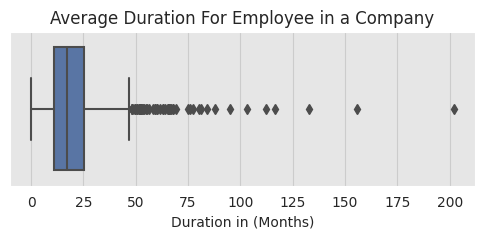

In [96]:
# boxplot of turnover rate
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxplot(
    data=all_group,
    x='turnover_rate',
    ax=ax
)
ax.set_title('Average Duration For Employee in a Company')
ax.set_xlabel('Duration in (Months)')
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have about 2401 experiences in different companies | Matches |
>| The turnover is high and months that employee lasts in company is low | The average is 21 months which is about a 1 year 9 months which is similar to the global duration for software industry which is about 2 years and this is considered a high turnover rate compared to the other industries|  Matches |
<br> 

### Hypothesis: AI engineers has higher turn over rates.

In [98]:
ai_data = df[df['title_tag'] == 'AI']
other_data = df[df['title_tag'] != 'AI']

In [99]:
ai_group = ai_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
ai_group['turnover_rate'] = ai_group['Duration'] / ai_group['Company']

In [100]:
print(f"Average turnover rate for AI: {ai_group['turnover_rate'].mean():.2f} months with std: {ai_group['turnover_rate'].std():.2f} months")

Average turnover rate for AI: 16.87 months with std: 13.56 months


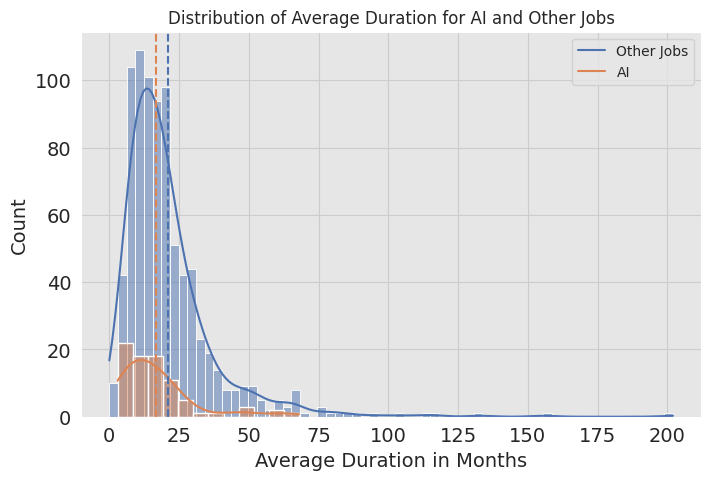

In [103]:
# plot distribution of turnover rate for AI and other jobs

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=all_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='Other Jobs',
    legend=False,
)
sns.histplot(
    data=ai_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='AI Jobs',
    legend=False,
)
# show mean
ax.axvline(all_group['turnover_rate'].mean(), color=sns_c[0], linestyle='--')
ax.axvline(ai_group['turnover_rate'].mean(), color=sns_c[1], linestyle='--')
ax.set_title('Distribution of Average Duration for AI and Other Jobs')
ax.set_xlabel('Average Duration in Months', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(['Other Jobs', 'AI'])
plt.show()

In [14]:
other_group = other_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
other_group['turnover_rate'] = other_group['Duration'] / other_group['Company']

In [15]:
print(f"Average turnover rate for other: {other_group['turnover_rate'].mean():.2f} months with std: {other_group['turnover_rate'].std():.2f} months")

Average turnover rate for other: 21.28 months with std: 16.70 months


In [16]:
# implement t-test
from scipy import stats
stats.ttest_ind(ai_group['turnover_rate'], other_group['turnover_rate'])

Ttest_indResult(statistic=-2.314195392921028, pvalue=0.02088442221017617)

In [17]:
# implement mann-whitney test
stats.mannwhitneyu(ai_group['turnover_rate'], other_group['turnover_rate'])

MannwhitneyuResult(statistic=26105.0, pvalue=0.0015434794289472774)

Mann-Whitney U Test: The Mann-Whitney U test is a non-parametric test that is used to compare the medians of two groups. It is used when the data are not normally distributed and the sample sizes are small. The test does not assume any particular distribution of the data.